In [1]:
from main import *
import matplotlib.pyplot as plt
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

True

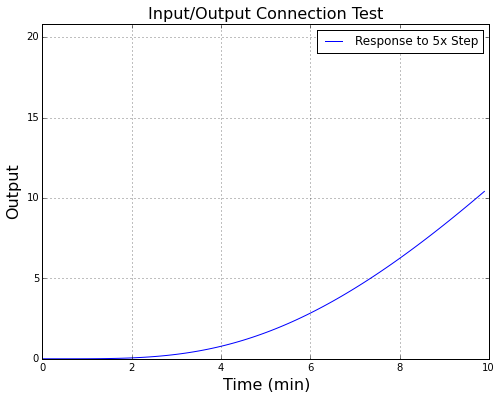

In [6]:
cell = Cell(1, removable_genes=1, permanent_genes=2)

# add activation

cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='repression')
cell.add_non_coding_gene()
cell.add_post_transcriptional_regulation(target=0)

# cell.add_catalytic_degradation(degraded=1, enzyme=5)
# cell.add_protein_modification(substrate=5, enzyme=3)

interaction_check(cell, output=1, input_=2, plot=True)


In [7]:
network_connected_check(cell, output=1, input_= 2)

True

In [66]:
cell.proteins

[1, 3, 5, 6]

In [67]:
cell.coding_rnas

[0, 2, 4]

In [68]:
cell.get_topology()

([(1, 2, 'activation'), (0, 3, 'catalytic_modification')],
 {0: 'permanent gene',
  1: 'permanent gene',
  2: 'removable gene',
  3: 'modified protein'})

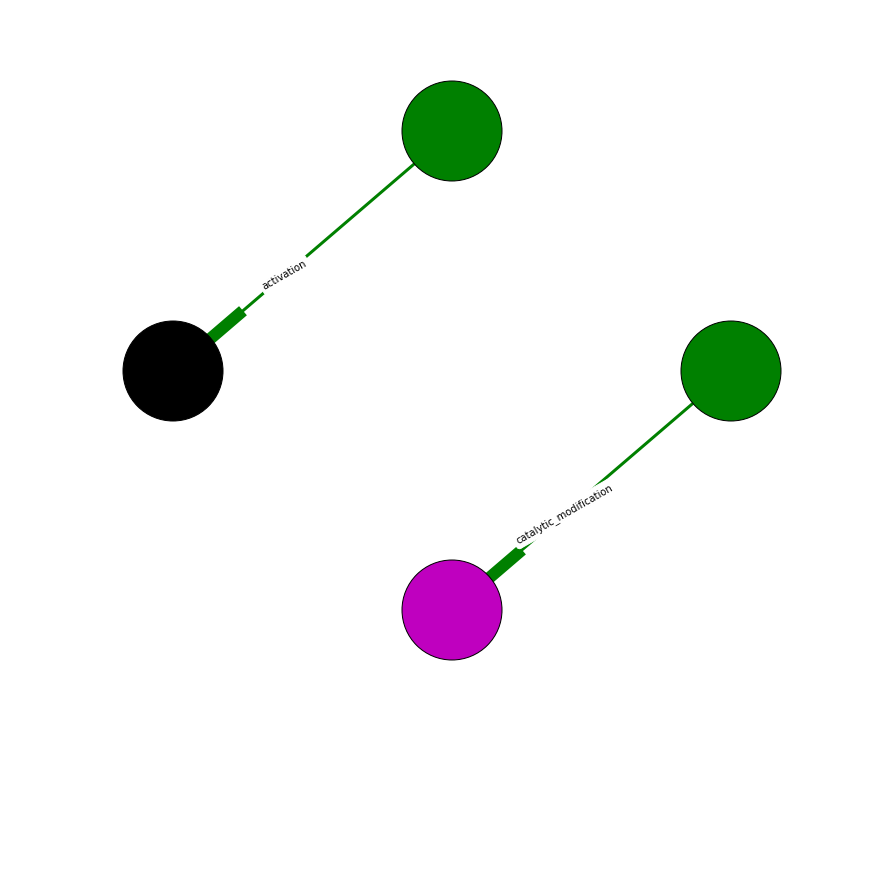

In [75]:
cell.show_topology()

In [4]:
steady_states, output_ss = get_ss(cell, output=1)

print(steady_states)

[  0.25116934   0.1999911    0.1999911   14.18769471  11.8394297
  11.8394297 ]


In [13]:
population, score_evolution = run_simulation(generations=2, population_size=10, mutations_per_division=2, retall=True)

Generation 0 : 2.5 edges in average network
Generation 1 : 1.5 edges in average network


[] [0]
[0] []
[0] [1]
[1] []
[] [2]
[2] []
[2] [3]
[3] []
[] [4]
[4] []
[3, 1] []
[5] []
[3] [5]
[5, 1] []


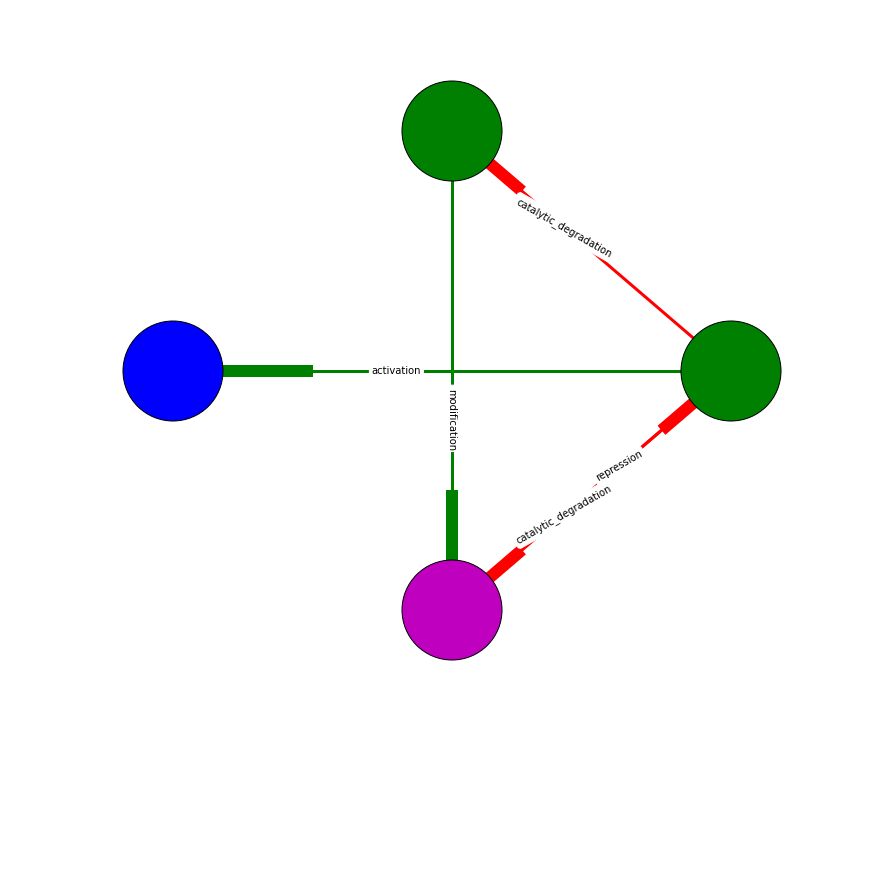

In [17]:
cell = population[3]

for rxn in cell.reactions:
    print(rxn.reactants, rxn.products)
    
cell.show_topology()

In [41]:
disturbance = Signal(name='driver', duration=200, dt=0.1, channels=1)
disturbance.step(magnitude=1)

# cell.simulate(disturbance, input_node=0,)

get_fitness_2(cell, plot=True)

(None, None)

In [44]:
for rxn in cell.reactions:
    print(rxn.reactants, rxn.products, rxn.rate_constant)
    
for mod in cell.rate_mods:
    print(mod.promotion_strength)

[] [0] 0.0
[0] [] 0.05
[0] [1] 1.5
[1] [] 0.025
[] [2] 0.0
[2] [] 0.05
[2] [3] 1.5
[3] [] 0.025


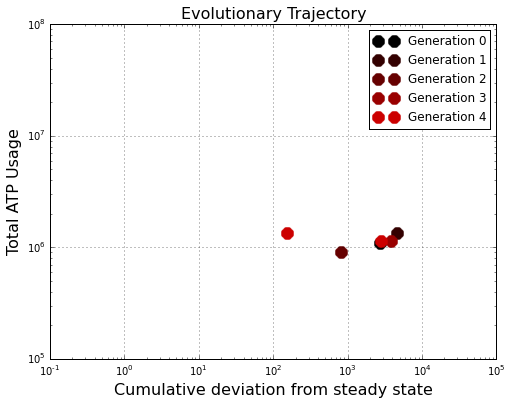

In [35]:
# ax1 = plot_1D_trajectory(score_evolution, obj=1)
ax2 = plot_2D_trajectory(score_evolution, obj=(0, 1))
ax2.set_xlim(1e-1, 1e5)
ax2.set_ylim(1e5, 1e8)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_ylabel('Total ATP Usage')
ax2.set_xlabel('Cumulative deviation from steady state')

In [36]:
# for gen, scores in score_evolution.items():
#     print('Generation:', gen)
#     print('Scores:', scores)
#     print('\n')

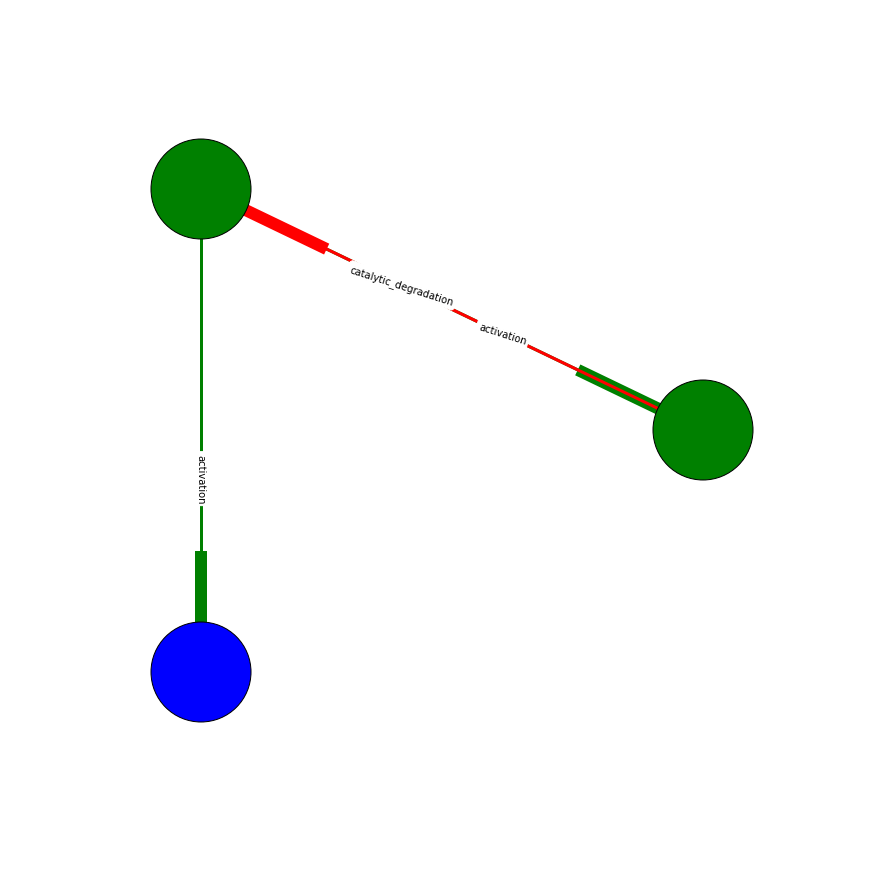

In [31]:
population[0].show_topology()

In [35]:
# import pickle as pickle
# pickle.dump(population, open( "population.p", "wb" ) )
# pickle.dump(score_evolution, open( "score_evolution.p", "wb" ) )

0.18275308779


False

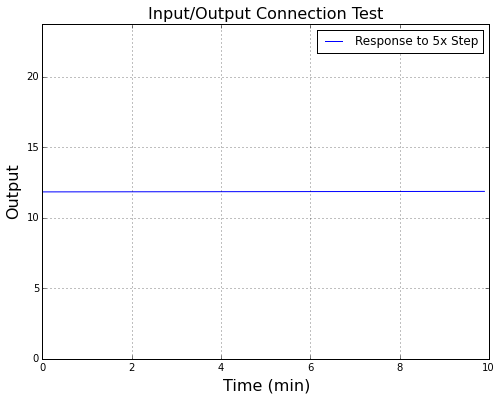

In [30]:
interaction_check(population[0], output=1, input_=2, plot=True)

[188.64839644376653, 400639.76457987132]

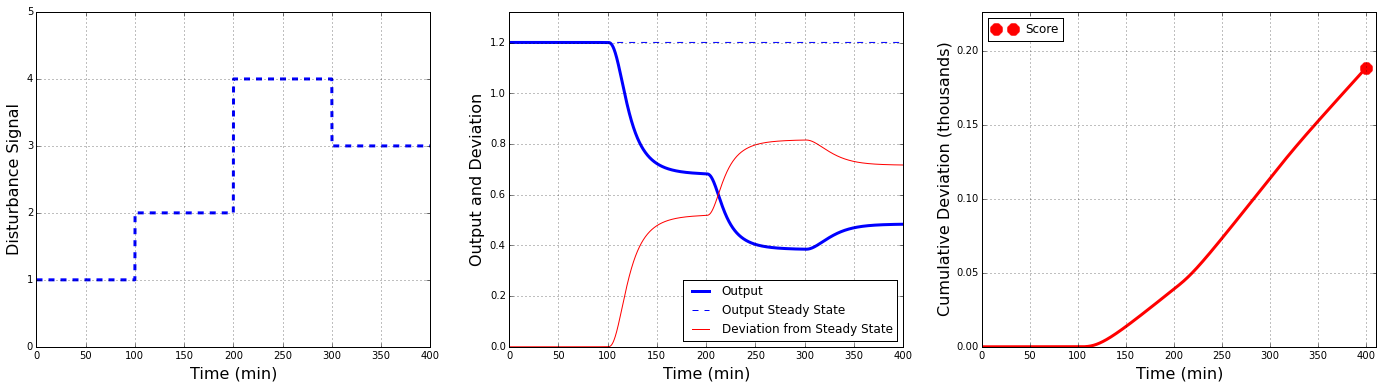

In [52]:
cell = population[0]

get_fitness_2(cell, plot=True)